In [1]:
import numpy as np
from io_utils import loadGraph, permuteNoiseMat, writeEdgesToFile

A = loadGraph('facebook/0.edges', 'u')

B = permuteNoiseMat(A,is_perm=True, has_noise=False)

writeEdgesToFile('metadata/B.edges', B)

In [2]:
from attr_utils import *

attributesA = getUndirAttribute('facebook/0.edges')
with open('metadata/attributesA', 'w') as f:
    for index, row in attributesA.iterrows():
        f.write(str(attributesA.ix[index]))

attributesB = getUndirAttribute('metadata/B.edges')
with open('metadata/attributesB', 'w') as f:
    for index, row in attributesB.iterrows():
        f.write(str(attributesB.ix[index]))

In [3]:
from lsh_utils import *

combineAB = selectAndCombine(attributesA, attributesB)

bandDeg = ['Degree','PageRank']
bucketDeg = generateCosineBuckets(selectAndCombine(attributesA, attributesB, bandDeg), 20)
with open('metadata/buckets-band-1', 'w') as f:
    for k, v in bucketDeg.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketDeg.items())

bandEdge = ['NodeBetweennessCentrality','FarnessCentrality', 'NodeEccentricity']
bucketEdge = generateCosineBuckets(selectAndCombine(attributesA, attributesB, bandEdge), 20)
with open('metadata/buckets-band-2', 'w') as f:
    for k, v in bucketEdge.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketEdge.items())

buckets = [bucketDeg, bucketEdge]

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


9
9
[['facebook/0.edges' 236 36 ..., 3.1122314984328425 0.004900166560021472 8]
 ['facebook/0.edges' 186 43 ..., 2.892656883512734 0.005582386970586673 7]
 ['facebook/0.edges' 122 62 ..., 2.755820529287159 0.008109654553758916 7]
 ..., 
 ['metadata/B.edges' 299 2 ..., 3.885516011847138 0.0011066314080781289 7]
 ['metadata/B.edges' 256 1 ..., 7.312789349078398 0.001596311374409954 11]
 ['metadata/B.edges' 317 2 ..., 4.343758686463016 0.0008481833892156252 9]]


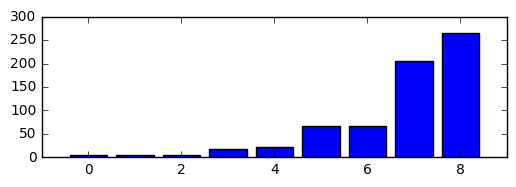

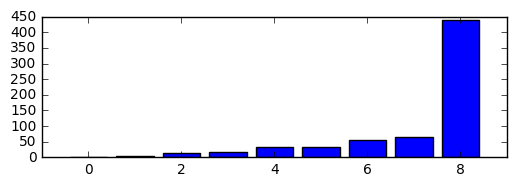

In [6]:
pair_count_dict = combineBucketsBySum(buckets, combineAB, 'facebook/0.edges')
            
import matplotlib.pyplot as plt
plt.subplot(211)
plotBucketDistribution(bucketDeg)
plt.subplot(212)
plotBucketDistribution(bucketEdge)
plt.show()

In [7]:
matching_matrix = computeMatchingMat(attributesA, attributesB, pair_count_dict)
sim_matrix = computeWholeSimMat(attributesA, attributesB)

In [8]:
show_list = [0, 10, 20, 50]
top_k = 5
for i in show_list:
    print "cos sim top %d for node %d:" %(top_k, attributesA['Id'][i])
    print attributesB['Id'][sim_matrix[i].argsort()[-top_k:]].values
    print "matching top %d for node %d:"%(top_k, attributesA['Id'][i])
    print attributesB['Id'][matching_matrix[i].argsort()[-top_k:]].values


cos sim top 5 for node 236:
[219 307 215 297 331]
matching top 5 for node 236:
[127 219 307 215 297]
cos sim top 5 for node 130:
[128  74 140 111 132]
matching top 5 for node 130:
[162  74 111 140 132]
cos sim top 5 for node 280:
[321 293 200 340 280]
matching top 5 for node 280:
[200 340  75 160 280]
cos sim top 5 for node 119:
[276 110 180  13 217]
matching top 5 for node 119:
[133 110 180  13 217]


In [ ]:
bandDeg = ['Degree','PageRank']
bucketDeg = generateEuclideanBuckets(selectAndCombine(attributesA, attributesB, bandDeg), 2)
with open('metadata/euc-buckets-band-1', 'w') as f:
    for k, v in bucketDeg.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketDeg.items())

bandEdge = ['NodeBetweennessCentrality','FarnessCentrality', 'NodeEccentricity']
bucketEdge = generateEuclideanBuckets(selectAndCombine(attributesA, attributesB, bandEdge), 2)
with open('metadata/euc-buckets-band-2', 'w') as f:
    for k, v in bucketEdge.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketEdge.items())